In [1]:
import json
import  pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow   as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

import math
import librosa

In [2]:
JSON_Path='./data_10.json'


In [4]:
def load_data(data_path):
    with open(data_path,"r") as fp:
        data=json.load(fp)

    # convert lists into numpy arrays
    inputs=np.array(data["mfcc"])
    targets=np.array(data["labels"])

    print("Data successfully loaded!")
    return inputs,targets

In [5]:
#Load Data
inputs,targets=load_data(JSON_Path)

Data successfully loaded!


In [6]:
inputs.shape

(9986, 130, 13)

In [7]:
#Create train/test split

X_train,X_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.3)

In [11]:
#Build the network architecture

model=keras.Sequential([

    #input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),
    
    #1st hidden layer
    keras.layers.Dense(512,activation='relu'),
   

    #2nd hidden layer
    keras.layers.Dense(256,activation='relu'),
    

    #3rd hidden layer
    keras.layers.Dense(64,activation='relu'),

    #output layer
    keras.layers.Dense(10,activation='softmax')
])

    


In [13]:
#compile model
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1690)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               865792    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 64)                16448     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [14]:
#train model
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)


Epoch 1/100
219/219 [==============================] - 4s 16ms/step - loss: 8.3845 - accuracy: 0.3139 - val_loss: 3.9844 - val_accuracy: 0.3471
Epoch 2/100
219/219 [==============================] - 3s 15ms/step - loss: 2.9948 - accuracy: 0.4132 - val_loss: 2.9708 - val_accuracy: 0.4012
Epoch 3/100
219/219 [==============================] - 3s 15ms/step - loss: 2.0975 - accuracy: 0.4775 - val_loss: 2.5450 - val_accuracy: 0.4052
Epoch 4/100
219/219 [==============================] - 3s 15ms/step - loss: 1.7554 - accuracy: 0.5197 - val_loss: 2.3327 - val_accuracy: 0.4516
Epoch 5/100
219/219 [==============================] - 3s 15ms/step - loss: 1.4111 - accuracy: 0.5761 - val_loss: 2.2126 - val_accuracy: 0.4339
Epoch 6/100
219/219 [==============================] - 3s 15ms/step - loss: 1.2347 - accuracy: 0.6217 - val_loss: 2.3793 - val_accuracy: 0.4262
Epoch 7/100
219/219 [==============================] - 3s 16ms/step - loss: 1.0629 - accuracy: 0.6587 - val_loss: 2.1336 - val_accuracy:

In [15]:
def plot_history(history):

    fig, axis=plt.subplots(2)

    #create accuracy subplot
    axis[0].plot(history.history['accuracy'],label='train accuracy')
    axis[0].plot(history.history['val_accuracy'],label='test accuracy')
    axis[0].set_ylabel('Accuracy')
    axis[0].legend(loc='lower right')
    axis[0].set_title('Accuracy eval')

    #create error subplot
    axis[1].plot(history.history['loss'],label='train error')
    axis[1].plot(history.history['val_loss'],label='test error')
    axis[1].set_ylabel('Error')
    axis[1].set_xlabel('Epoch')
    axis[1].legend(loc='upper right')
    axis[1].set_title('Error eval')

    plt.show()

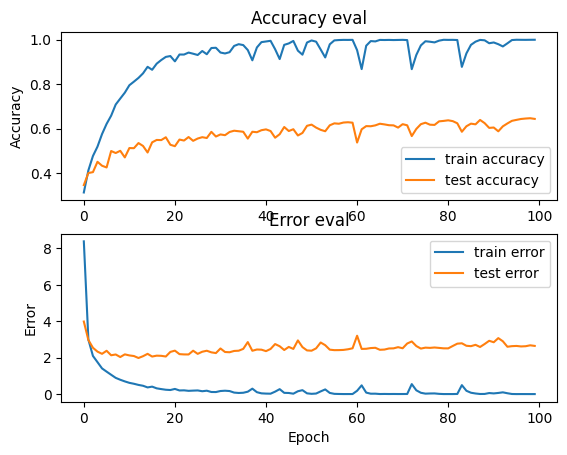

In [16]:
plot_history(history)

MANAGING OVERFITTING

In [17]:
model_regularized=keras.Sequential([

    #input layer
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])),

    #1st hidden layer
    keras.layers.Dense(512,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    #2nd hidden layer
    keras.layers.Dense(256,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    #3rd hidden layer
    keras.layers.Dense(64,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    #output layer
    keras.layers.Dense(10,activation='softmax')

])


In [18]:
optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model_regularized.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [19]:
history_regularized=model_regularized.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32)

Epoch 1/100
219/219 [==============================] - 7s 25ms/step - loss: 23.0608 - accuracy: 0.1612 - val_loss: 3.4092 - val_accuracy: 0.2737
Epoch 2/100
219/219 [==============================] - 6s 26ms/step - loss: 6.5968 - accuracy: 0.1677 - val_loss: 3.4120 - val_accuracy: 0.1569
Epoch 3/100
219/219 [==============================] - 5s 21ms/step - loss: 4.4936 - accuracy: 0.1551 - val_loss: 3.4275 - val_accuracy: 0.1512
Epoch 4/100
219/219 [==============================] - 5s 22ms/step - loss: 3.8792 - accuracy: 0.1710 - val_loss: 3.3950 - val_accuracy: 0.1729
Epoch 5/100
219/219 [==============================] - 5s 21ms/step - loss: 3.6882 - accuracy: 0.1712 - val_loss: 3.3484 - val_accuracy: 0.1876
Epoch 6/100
219/219 [==============================] - 4s 20ms/step - loss: 3.5633 - accuracy: 0.1834 - val_loss: 3.3336 - val_accuracy: 0.1976
Epoch 7/100
219/219 [==============================] - 4s 20ms/step - loss: 3.5042 - accuracy: 0.1881 - val_loss: 3.3197 - val_accuracy

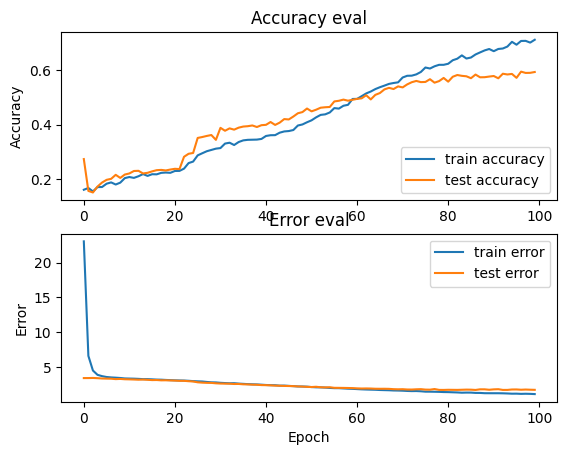

In [20]:
#plot accuracy and error over the epochs

plot_history(history_regularized)

Convulution Neural Network (CNN)

In [21]:
#Create train, validation and test sets

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.25)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

#add an axis to the input sets

X_train=X_train[...,np.newaxis]
X_validation=X_validation[...,np.newaxis]
X_test=X_test[...,np.newaxis]



In [22]:
input_shape=(X_train.shape[1],X_train.shape[2],1)


In [37]:
#build CNN

model_cnn=keras.Sequential()

#1st conv layer
model_cnn.add(keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
model_cnn.add(keras.layers.BatchNormalization())

#2nd conv layer
model_cnn.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model_cnn.add(keras.layers.MaxPooling2D((3,3),strides=(2,2),padding='same'))
model_cnn.add(keras.layers.BatchNormalization())




#flatten output and feed it into dense layer
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64,activation='relu'))
model_cnn.add(keras.layers.Dropout(0.3))

#output layer
from keras.regularizers import l2

model_cnn.add(keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_cnn.add(keras.layers.Dense(10,activation='softmax'))


In [38]:
#compile model
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 50:
        lr *= 0.5
    if epoch > 100:
        lr *= 0.2
    return lr

optimizer = Adam(learning_rate=lr_schedule(0))
model_cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

lr_scheduler = LearningRateScheduler(lr_schedule)

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
model_cnn.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [39]:
model_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 128, 11, 64)       640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 6, 64)        0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 64, 6, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_14 (Conv2D)          (None, 62, 4, 32)         18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 31, 2, 32)        0         
 g2D)                                                            
                                                      

In [41]:
history_cnn=model_cnn.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=80)

Epoch 1/80
188/188 [==============================] - 14s 73ms/step - loss: 0.2387 - accuracy: 0.9416 - val_loss: 1.0324 - val_accuracy: 0.7356
Epoch 2/80
188/188 [==============================] - 15s 79ms/step - loss: 0.2284 - accuracy: 0.9474 - val_loss: 1.0361 - val_accuracy: 0.7210
Epoch 3/80
188/188 [==============================] - 12s 66ms/step - loss: 0.2311 - accuracy: 0.9429 - val_loss: 1.0202 - val_accuracy: 0.7423
Epoch 4/80
188/188 [==============================] - 13s 67ms/step - loss: 0.2140 - accuracy: 0.9531 - val_loss: 1.0480 - val_accuracy: 0.7330
Epoch 5/80
188/188 [==============================] - 13s 68ms/step - loss: 0.2109 - accuracy: 0.9523 - val_loss: 1.0775 - val_accuracy: 0.7316
Epoch 6/80
188/188 [==============================] - 13s 68ms/step - loss: 0.2038 - accuracy: 0.9554 - val_loss: 1.0485 - val_accuracy: 0.7377
Epoch 7/80
188/188 [==============================] - 12s 66ms/step - loss: 0.1887 - accuracy: 0.9608 - val_loss: 1.0413 - val_accuracy:

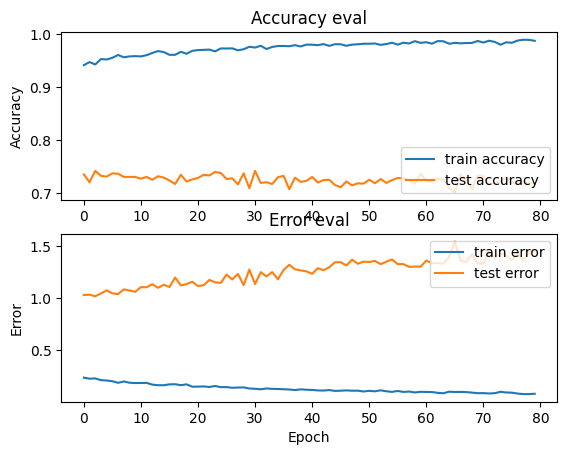

In [42]:
#plot accuracy and error over the epochs

plot_history(history_cnn)

In [43]:
#evaluate CNN on test set

test_error,test_accuracy=model_cnn.evaluate(X_test,y_test,verbose=2)

print("Accuracy on test set is {}".format(test_accuracy))


79/79 - 1s - loss: 1.5465 - accuracy: 0.7117 - 1s/epoch - 15ms/step
Accuracy on test set is 0.711654007434845


In [44]:
model_cnn.save('music_genre_cnn.h5')


In [45]:
reconstructed_model = keras.models.load_model("music_genre_cnn.h5")

In [46]:
#pick a sample to predict from the test set
X_to_predict=X_test[100]
y_to_predict=y_test[100]


In [47]:
X_to_predict.shape

(130, 13, 1)

In [48]:
print("real genre is {}".format(y_to_predict))


real genre is 3


In [50]:
# add a dimension for the sample
X_to_predict=X_to_predict[np.newaxis,...]

prediction=reconstructed_model.predict(X_to_predict)

1/1 [==============================] - 0s 253ms/step


In [51]:
predicted_index=np.argmax(prediction,axis=1)
print("predicted genre is {}".format(predicted_index))

predicted genre is [3]


In [52]:
import random
for i in range(10):
    i=random.randint(0,len(X_test))
    X_to_predict=X_test[i]
    y_to_predict=y_test[i]
    X_to_predict=X_to_predict[np.newaxis,...]
    print("real genre is {}".format(y_to_predict))
    prediction=reconstructed_model.predict(X_to_predict)
    predicted_index=np.argmax(prediction,axis=1)
    print("predicted genre is {}".format(predicted_index))
    

real genre is 2
1/1 [==============================] - 0s 38ms/step
predicted genre is [2]
real genre is 9
1/1 [==============================] - 0s 26ms/step
predicted genre is [9]
real genre is 7
1/1 [==============================] - 0s 21ms/step
predicted genre is [7]
real genre is 3
1/1 [==============================] - 0s 27ms/step
predicted genre is [7]
real genre is 9
1/1 [==============================] - 0s 24ms/step
predicted genre is [6]
real genre is 5
1/1 [==============================] - 0s 22ms/step
predicted genre is [5]
real genre is 7
1/1 [==============================] - 0s 23ms/step
predicted genre is [7]
real genre is 2
1/1 [==============================] - 0s 22ms/step
predicted genre is [2]
real genre is 9
1/1 [==============================] - 0s 20ms/step
predicted genre is [9]
real genre is 9
1/1 [==============================] - 0s 21ms/step
predicted genre is [9]
